In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.10.1
2.10.0


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
#fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
model = keras.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                          keras.layers.Dense(300, activation='relu'),
                          keras.layers.Dense(100, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

In [6]:
# summarize NN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
# get layers
model.layers

In [8]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [9]:
model.get_layer('dense') is hidden1

True

In [10]:
#get weights and bias
weights, bias = hidden1.get_weights()
print(weights)
print(f'weight shape: {weights.shape}')
print(bias)
print(f'bias shape: {bias.shape}')

[[-0.05559432  0.01138882 -0.03279619 ... -0.07360753 -0.07379715
  -0.03551815]
 [ 0.00547179 -0.02963923  0.02468852 ... -0.0699512   0.02959558
  -0.05636083]
 [-0.05857983 -0.07011451 -0.06170375 ... -0.05495803  0.05304281
  -0.01870771]
 ...
 [ 0.05384728  0.04856554 -0.00360242 ... -0.05024771 -0.06913153
   0.01205105]
 [-0.05967417  0.03669558 -0.05562736 ...  0.03956118  0.01679319
   0.07100287]
 [-0.06741107 -0.05025945 -0.05393945 ...  0.01023094 -0.04931925
   0.05971317]]
weight shape: (784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [11]:
#compling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy')

In [12]:
#training model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7196 - accuracy: 0.7676 - val_loss: 0.5191 - val_accuracy: 0.8308
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4912 - accuracy: 0.8284 - val_loss: 0.4636 - val_accuracy: 0.8414
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4464 - accuracy: 0.8433 - val_loss: 0.4413 - val_accuracy: 0.8512
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4208 - accuracy: 0.8523 - val_loss: 0.4042 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4009 - accuracy: 0.8596 - val_loss: 0.3843 - val_accuracy: 0.8732
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3833 - accuracy: 0.8653 - val_loss: 0.3670 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3704 - accuracy: 0.8698 - val_loss: 0.3631 - val_accuracy:

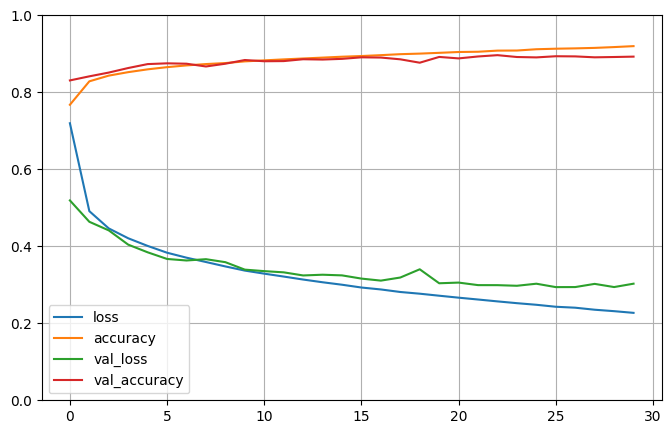

In [13]:
#fit() return a History object that contains training parameters, history.history dictionary containg loss
# and extra metrics it measured
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

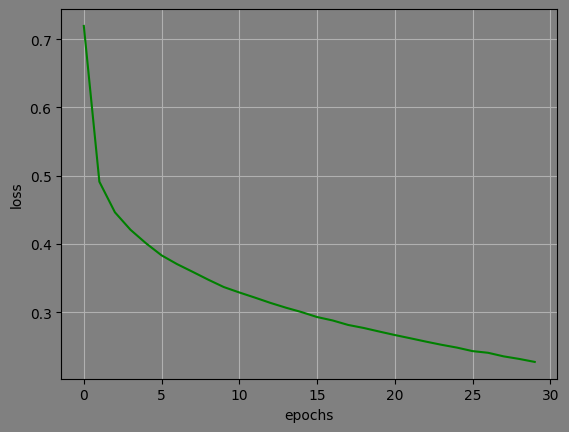

In [14]:
loss_series = pd.Series(history.history['loss'])
plt.plot(loss_series, color = 'green')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.gcf().set_facecolor('gray')
plt.gca().set_facecolor('gray')
plt.show()

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 58.8266 - accuracy: 0.8568


[58.82658004760742, 0.8568000197410583]

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

1/1 [==============================] - 0s 85ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
###BUILDING a REGRESSION MLP using the Sequential API
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid =  train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [18]:
#build MLP for regression
model = keras.models.Sequential([keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
                                 keras.layers.Dense(1)])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.6403 - val_loss: 0.8142
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.1033 - val_loss: 1.5785
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9468 - val_loss: 0.5321
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4945 - val_loss: 0.4513
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4501 - val_loss: 0.4177
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4315 - val_loss: 0.4081
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4181 - val_loss: 0.4176
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4170 - val_loss: 0.3947
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4062 - val_loss: 0.3842
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3965 - val_loss: 0.3729

In [19]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 33ms/step


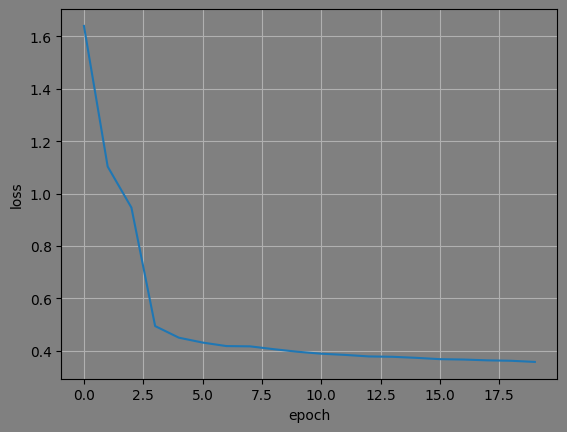

In [20]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.gcf().set_facecolor('gray')
plt.gca().set_facecolor('gray')
plt.show()

In [21]:
# Deep and wide neural network
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [22]:
# send 5 features go through wide path, and 6 features through deep path
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [23]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20


c:\Users\BRUH\anaconda3\envs\myenv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


363/363 [==============================] - 2s 4ms/step - loss: 2.0706 - val_loss: 0.8223
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7392 - val_loss: 0.6499
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6433 - val_loss: 0.5966
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6050 - val_loss: 0.5671
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5802 - val_loss: 0.5473
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5617 - val_loss: 0.5305
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5468 - val_loss: 0.5195
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5352 - val_loss: 0.5091
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5254 - val_loss: 0.5015
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5176 - val_loss: 0.4946
Epoch 11/2

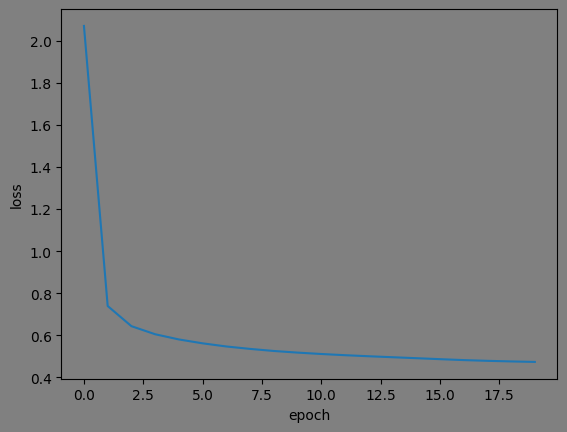

In [24]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.gcf().set_facecolor('gray')
plt.gca().set_facecolor('gray')
plt.show()

In [31]:
output =  keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])


In [32]:
#compling model
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [33]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 0.9076 - main_output_loss: 0.7939 - aux_output_loss: 1.9307 - val_loss: 0.5441 - val_main_output_loss: 0.4676 - val_aux_output_loss: 1.2326
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7182 - main_output_loss: 0.6681 - aux_output_loss: 1.1696 - val_loss: 0.5803 - val_main_output_loss: 0.5344 - val_aux_output_loss: 0.9937
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7058 - main_output_loss: 0.6781 - aux_output_loss: 0.9551 - val_loss: 0.6172 - val_main_output_loss: 0.5810 - val_aux_output_loss: 0.9431
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4949 - main_output_loss: 0.4570 - aux_output_loss: 0.8368 - val_loss: 0.4560 - val_main_output_loss: 0.4209 - val_aux_output_loss: 0.7713
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4768 - main_output_loss: 0.4466 - aux_output_loss: 0.7485 - val_loss

In [40]:
# Subclass API
class WideAndDeepNN(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepNN()



In [42]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='checkpoints', save_weights_only=True, verbose=1)
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd', )
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
          callbacks=[cp_callback])

Epoch 1/10
363/363 [==============================] - ETA: 0s - loss: 0.4295 - output_1_loss: 0.4104 - output_2_loss: 0.6016
Epoch 1: saving model to checkpoints
363/363 [==============================] - 3s 6ms/step - loss: 0.4295 - output_1_loss: 0.4104 - output_2_loss: 0.6016 - val_loss: 0.3976 - val_output_1_loss: 0.3759 - val_output_2_loss: 0.5930
Epoch 2/10
357/363 [============================>.] - ETA: 0s - loss: 0.4171 - output_1_loss: 0.3984 - output_2_loss: 0.5858
Epoch 2: saving model to checkpoints
363/363 [==============================] - 2s 6ms/step - loss: 0.4157 - output_1_loss: 0.3967 - output_2_loss: 0.5861 - val_loss: 0.3915 - val_output_1_loss: 0.3708 - val_output_2_loss: 0.5771
Epoch 3/10
362/363 [============================>.] - ETA: 0s - loss: 0.4088 - output_1_loss: 0.3908 - output_2_loss: 0.5707
Epoch 3: saving model to checkpoints
363/363 [==============================] - 2s 6ms/step - loss: 0.4086 - output_1_loss: 0.3906 - output_2_loss: 0.5707 - val_loss

In [43]:
#restoring model
cmodel = WideAndDeepNN()
model.load_weights('checkpoints')

In [44]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 1s 4ms/step - loss: 0.3811 - output_1_loss: 0.3662 - output_2_loss: 0.5146


[0.38106420636177063, 0.36622610688209534, 0.5146054029464722]

In [45]:
import os 
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [51]:
#fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [52]:
print(X_valid.shape)
print(X_train.shape)

(5000, 28, 28)
(55000, 28, 28)


In [53]:
model = keras.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                          keras.layers.Dense(400, activation='relu'),
                          keras.layers.Dense(400, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

#compile model
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7181 - accuracy: 0.7653 - val_loss: 0.5115 - val_accuracy: 0.8308
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4868 - accuracy: 0.8296 - val_loss: 0.4962 - val_accuracy: 0.8252
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4403 - accuracy: 0.8459 - val_loss: 0.4157 - val_accuracy: 0.8584
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4147 - accuracy: 0.8552 - val_loss: 0.3912 - val_accuracy: 0.8662
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3942 - accuracy: 0.8622 - val_loss: 0.3887 - val_accuracy: 0.8678
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3776 - accuracy: 0.8670 - val_loss: 0.3712 - val_accuracy: 0.8714
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3653 - accuracy: 0.8716 - val_loss: 0.3642 - val_accuracy: